# Отчёт по производительности для задания №2 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

text = Path("../Results/2_log.txt").read_text(encoding="utf-8")

size_re = re.compile(r"Vector size:\s*(\d+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"  Time:\s*([0-9\.]+)\s*ms\s*\(speedup:\s*([0-9\.]+)x,\s*efficiency:\s*([0-9\.]+)\)")

records = []
current_size = None
lines = text.splitlines()

for i, line in enumerate(lines):
    m_size = size_re.search(line)
    if m_size:
        current_size = int(m_size.group(1))
        continue
    m_threads = threads_re.search(line)
    if m_threads:
        threads = int(m_threads.group(1))
        if i + 1 < len(lines):
            next_line = lines[i + 1]
            m_time = time_re.search(next_line)
            if m_time:
                time_ms = float(m_time.group(1))
                speedup = float(m_time.group(2))
                efficiency = float(m_time.group(3))
                records.append({
                    'size': current_size,
                    'threads': threads,
                    'time_ms': time_ms,
                    'speedup': speedup,
                    'efficiency': efficiency
                })

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df

Rows: 24


,size,threads,time_ms,speedup,efficiency
0,100000,1,0.530236,1.00000,1.000000
1,100000,2,0.207722,2.55262,1.276310
2,100000,4,0.138556,3.82688,0.956721
3,100000,6,0.169153,3.13466,0.522444
4,100000,8,0.179098,2.96060,0.370075
5,100000,12,0.168681,3.14343,0.261953
6,1000000,1,3.078630,1.00000,1.000000
7,1000000,2,1.585380,1.94189,0.970945
8,1000000,4,0.807097,3.81444,0.953611
9,1000000,6,0.574347,5.36022,0.893370


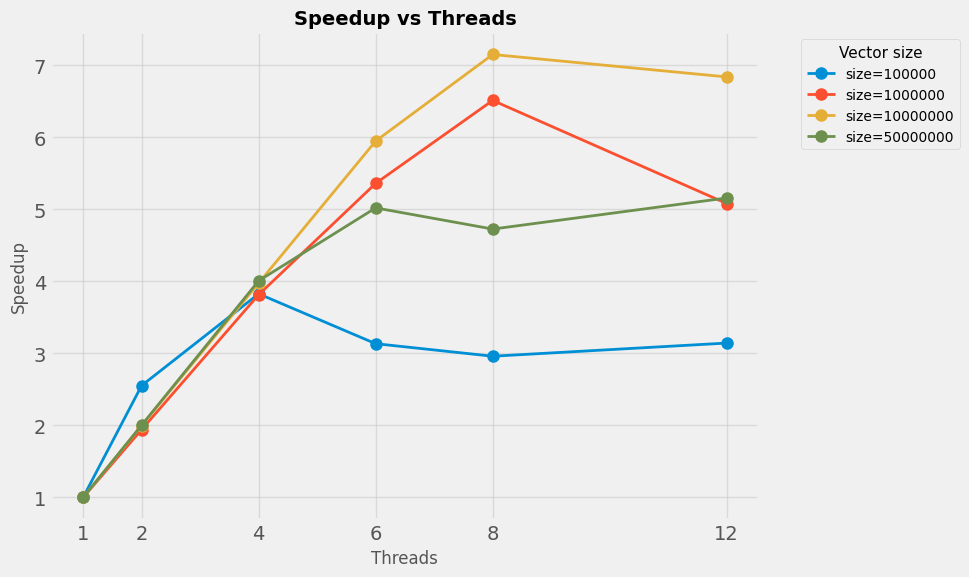

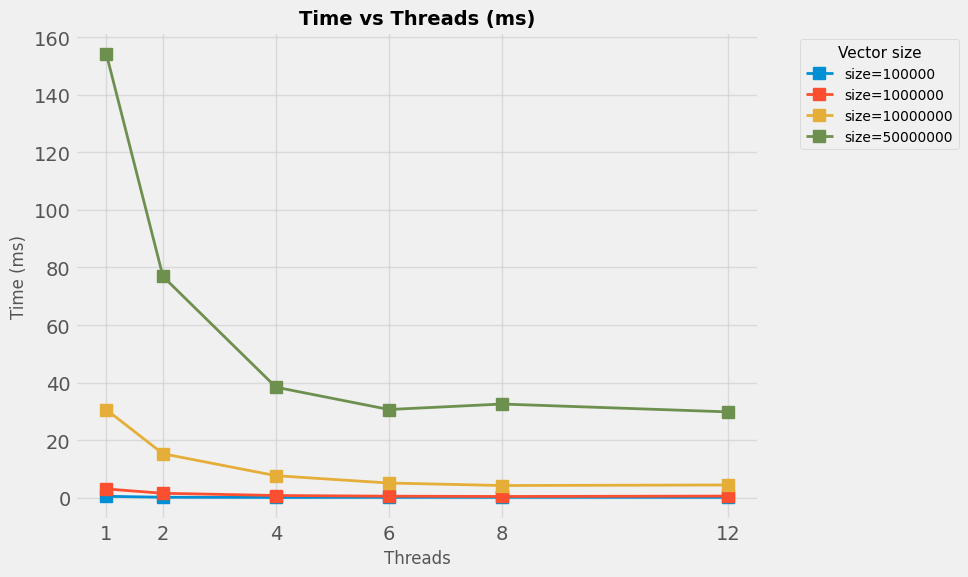

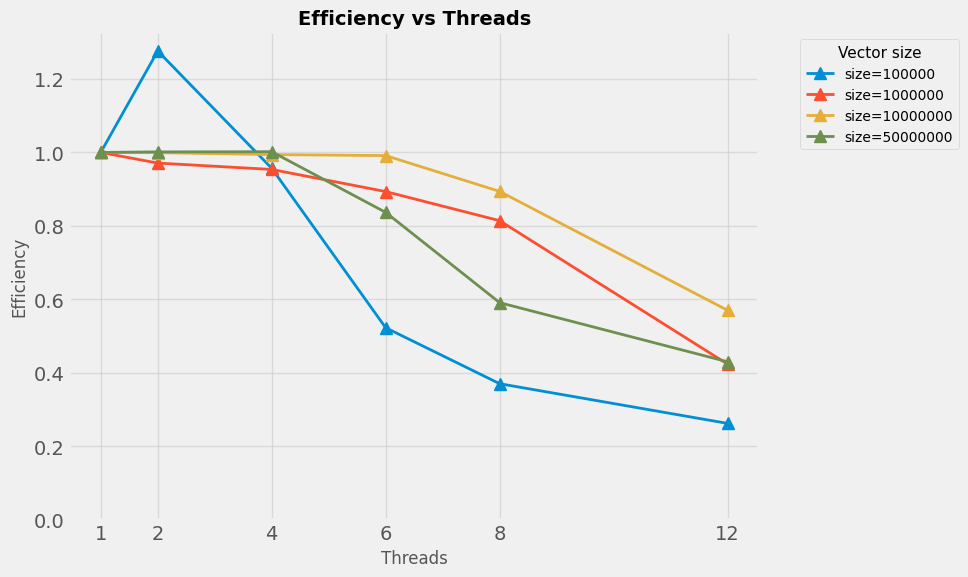

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

sizes = sorted(df['size'].unique())
threads = sorted(df['threads'].unique())

# 1) Speedup vs Threads
plt.figure(figsize=(10, 6))
for s in sizes:
    sub = df[df['size'] == s].sort_values('threads')
    plt.plot(sub['threads'], sub['speedup'], marker='o', linewidth=2, markersize=8, label=f'size={s}')
plt.title('Speedup vs Threads', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Speedup', fontsize=12)
plt.grid(True, alpha=0.6)
plt.legend(title='Vector size', fontsize=10, title_fontsize=11, 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(threads)
plt.tight_layout()
plt.show()

# 2) Time vs Threads
plt.figure(figsize=(10, 6))
for s in sizes:
    sub = df[df['size'] == s].sort_values('threads')
    plt.plot(sub['threads'], sub['time_ms'], marker='s', linewidth=2, markersize=8, label=f'size={s}')
plt.title('Time vs Threads (ms)', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)
plt.grid(True, alpha=0.6)
plt.legend(title='Vector size', fontsize=10, title_fontsize=11, 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(threads)
plt.tight_layout()
plt.show()

# 3) Efficiency vs Threads
plt.figure(figsize=(10, 6))
for s in sizes:
    sub = df[df['size'] == s].sort_values('threads')
    plt.plot(sub['threads'], sub['efficiency'], marker='^', linewidth=2, markersize=8, label=f'size={s}')
plt.title('Efficiency vs Threads', fontsize=14, fontweight='bold')
plt.xlabel('Threads', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.grid(True, alpha=0.6)
plt.legend(title='Vector size', fontsize=10, title_fontsize=11, 
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(threads)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()